In [117]:
import numpy as np
import matplotlib.pyplot as plt
import time

In [137]:
def randompoint():
    '''
    returns a point in space with goal bias
    '''
    x1=np.random.uniform(*xlimits,1)
    y1=np.random.uniform(*ylimits,1)
    x2=goal[0]
    y2=goal[1]

    ch=np.random.choice([1,2],p=[1-0.05,0.05])
    if ch==1:
        return (x1[0],y1[0])
    if ch==2:
        return (x2,y2)

def nearestnode(point):
    '''
    returns a nearest node from input
    '''
    mindist=float('inf')
    for i in range(len(keys)):
        dist=np.sqrt((keys[i][0]-point[0])**2+(keys[i][1]-point[1])**2)
        if dist<mindist:
            mindist=dist
            indx=i
    return keys[indx]

def nextnode(node,point):
    '''
    returns the next node in tree if possible
    else 1
    '''
    if np.sqrt((node[0]-point[0])**2+(node[1]-point[1])**2)>1:
        angle=np.arctan2(point[1]-node[1],point[0]-node[0])
        x=node[0]+step*np.cos(angle)
        y=node[1]+step*np.sin(angle)
        if through_obstacle((*node,x,y),obstacles)==1:
            return 1
        else:
            return (x,y)
    else:
        if through_obstacle((*node,*point),obstacles)==1:
            return 1
        else:
            return point

def through_obstacle(line,obstacles):
    """
    returns 1 if the line goes through any obstacles
    0 otherwise
    """
    for i in range(100):
        if inside_obstacle((line[0]+(i*(line[2]-line[0])/10),line[1]+(i*(line[3]-line[1])/10)),obstacles)==1:
            return 1
    return 0

def inside_obstacle(point,obstacle):
    """
    returns 1 if the point is inside any obstacles
    0 otherwise
    """
    for obs in obstacle:
        if point[0]>obs[0][0] and point[0]<obs[0][2] and point[1]>obs[1][0] and point[1]<obs[1][2]:
            return 1
    return 0

found


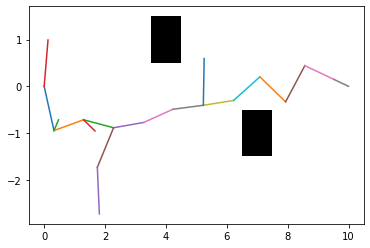

In [198]:
# ********************************************************************************* #
# GoalBiasRRT
# ********************************************************************************* #

obstacles=[[(3.5,4.5,4.5,3.5),(0.5,0.5,1.5,1.5)],
           [(6.5,7.5,7.5,6.5),(-1.5,-1.5,-0.5,-0.5)]]
xlimits=[-1,11]
ylimits=[-3,3]

start=[0, 0]

goal=[10, 0]

bias=0.05

tree={'[0, 0]':[]}

keys=[[0,0]]

step=1

eps=0.25

for obs in obstacles:
    plt.fill(*obs,'k',alpha=1)

for iterations in range(5000):
    point=randompoint()
    node=nearestnode(point)
    # print(node[0])
    if nextnode(node,point)==1:
        continue
    newnode=nextnode(node,point)
    # print(newnode)
    # plt.plot(np.transpose([node,[*newnode]]))
    plt.plot((node[0],newnode[0]),(node[1],newnode[1]))
    tree[str(node)].append(str([*newnode]))
    tree[str([*newnode])]=[]
    keys.append([*newnode])
    if (np.sqrt((newnode[0]-goal[0])**2+(newnode[1]-goal[1])**2))<=eps:
        print("found")
        break

# print(tree)



In [199]:
for i in tree:
    tree[str(i)]=[tree[str(i)]]
    tree[str(i)].append([1]*len(*tree[str(i)]))
    tree[str(i)].append(1)

In [190]:
def pathcost(nodes):
    '''
    returns the path cost through the input nodes
    '''
    nodes.reverse()
    # print(nodes)
    length=0
    for i in range(len(nodes)-1):
        index=graph[nodes[i]][0].index(nodes[i+1])
        length=length+(graph[nodes[i]][1][index])
        pass
    return length

In [200]:
graph=tree

In [202]:
# ********************************************************************************* #
# A* and Dijkstra's algorithm
# ********************************************************************************* #

algo=int(input("\nWhich algorithm do you want to implement: a*(1) or dijkstra's(2)?"))

# starts with the start node
stack=[[0,str(start)]]
C=[]
# update
final=str(start)

t1=time.time()

iterations=0

while final!=str([*newnode]) and len(C)<len(graph):

    # add child nodes
    newstack=[]
    for child,cost in np.transpose([graph[stack[0][1]][0],graph[stack[0][1]][1]]):
        path=pathcost([child,*stack[0][1:]])
        if algo==1:
            newelement=[path+int(graph[child][2]),child,*stack[0][1:]]
        else:
            newelement=[path,child,*stack[0][1:]]
        newstack.append(newelement)
    
    # put first node in C list
    if stack[0][1] not in C:
        C.append(stack[0][1])
        # print(C)

    # delete first node in stack
    stack.pop(0)

    # update the newstack with remaining stack elements
    for x in range(len(stack)):
        newstack.append(stack[x])
    stack=newstack

    # sort
    stack.sort()
    print(stack)
    final=stack[0][1]

    iterations+=1

    pass

t2=time.time()-t1
if final==str([*newnode]):
    if algo==1:
        print("\nPath for A* is:",stack[0][1:],"\nThe cost is:",stack[0][0],"\nThe time taken is:",t2,"\nIterations:",iterations)
    else:
        print("\nPath for Dijkstra's is:",stack[0][1:],"\nThe cost is:",stack[0][0],"\nThe time taken is:",t2,"\nIterations:",iterations)
else:
    print("\nPath to Goal not found!!!")


[[1, '[0.12661208776058278, 0.9919523069346159]', '[0, 0]'], [1, '[0.32227978603533797, -0.9466444630974276]', '[0, 0]']]
[[1, '[0.32227978603533797, -0.9466444630974276]', '[0, 0]']]
[[2, '[0.47223018099063907, -0.7167730747560759]', '[0.32227978603533797, -0.9466444630974276]', '[0, 0]'], [2, '[1.295056767367993, -0.7149011900789264]', '[0.32227978603533797, -0.9466444630974276]', '[0, 0]']]
[[2, '[1.295056767367993, -0.7149011900789264]', '[0.32227978603533797, -0.9466444630974276]', '[0, 0]']]
[[3, '[1.669254323858195, -0.9545017894161418]', '[1.295056767367993, -0.7149011900789264]', '[0.32227978603533797, -0.9466444630974276]', '[0, 0]'], [3, '[2.2802872973950192, -0.8861343723265995]', '[1.295056767367993, -0.7149011900789264]', '[0.32227978603533797, -0.9466444630974276]', '[0, 0]']]
[[3, '[2.2802872973950192, -0.8861343723265995]', '[1.295056767367993, -0.7149011900789264]', '[0.32227978603533797, -0.9466444630974276]', '[0, 0]']]
[[4, '[1.7470275112251334, -1.7320859078497923